
## Pré-processamento de Dados e Regressão Linear Múltipla


### Objetivo

Aplicar técnicas de pré-processamento de dados e construir um modelo de regressão linear múltipla para prever uma variável dependente com base em múltiplas variáveis independentes.

###  Conjunto de Dados


 **Previsão de Preços de Carros**

   * **Descrição**: Inclui informações sobre veículos, como ano de fabricação, quilometragem, tipo de combustível e preço de venda, ideal para modelos de regressão.
   * **Link**: [Kaggle: Car Price Prediction](https://www.kaggle.com/datasets/erolmasimov/price-prediction-multiple-linear-regression)



### Etapas da Atividade


**Tema: Previsão dos Preços dos Carros**


#### 1. **Importação e Exploração dos Dados**

* Carregar o conjunto de dados usando o pandas.
* Visualizar as primeiras linhas para entender a estrutura.
* Utilizar métodos como `.info()`, `.describe()` e `.isnull().sum()` para obter informações sobre os dados.
* Fazer um análise preliminar dos dados, explicando os principais insgihts.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os

In [ ]:
from google.colab import files
upload = files.upload()

Saving scrap price.csv to scrap price.csv


In [ ]:
df = pd.read_csv('scrap price.csv')
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

,0
ID,0
symboling,0
name,0
fueltypes,0
aspiration,0
doornumbers,0
carbody,0
drivewheels,0
enginelocation,0
wheelbase,0


Correlação do Preço com Outras Variáveis:
 enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
ID                 -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


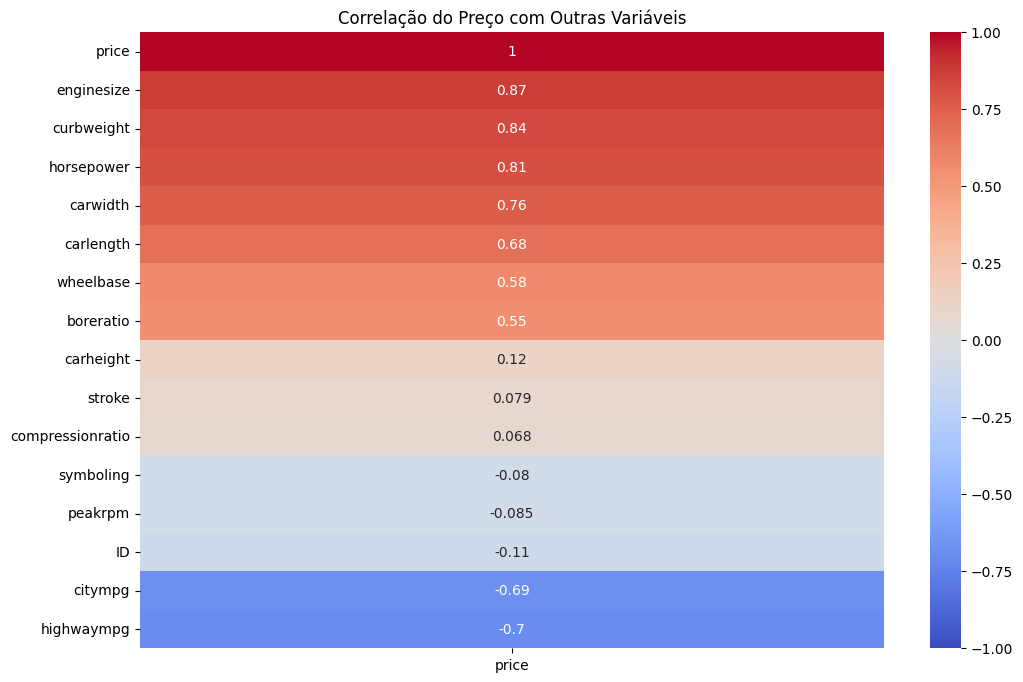

In [ ]:
# Calcula a matriz de correlação
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Seleciona a correlação de 'price' com as outras colunas
price_correlation = correlation_matrix['price']

# Remove a correlação de 'price' com ele mesmo
price_correlation = price_correlation.drop('price')

# Ordena os valores de correlação em ordem decrescente
price_correlation = price_correlation.sort_values(ascending=False)

# Exibe os valores de correlação
print("Correlação do Preço com Outras Variáveis:\n", price_correlation)

# Cria um mapa de calor para melhor visualização
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']].sort_values(by=['price'], ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação do Preço com Outras Variáveis')
plt.show()

Após uma análise dos dados dos veículos podemos observar a correlação das variáveis secundárias como: marca, peso, potência, economia, risco e os tipos de veículos como "carbody"(composto por carros hatchback, sedan, convertible) tem uma influência na variável principal que consideramos como o preço final do veículo (que varia por influência das outras variáveis).

**Como podemos analisar a partir das correlações vistas anteriormente:**

**Variáveis   -   Grau de Correlação**

* **Curbweight  -  Correlação positiva forte**: Carros mais pesados tendem a ter preços mais altos.

* **Horsepower	- 	Correlação positiva forte**: Carros com mais potência tendem a ter preços mais altos.

* **Carlength	 -  	Correlação positiva moderada**: Carros mais compridos tendem a ter preços mais altos.

* **Wheelbase	 - 	Correlação positiva moderada**: Carros com maior distância entre eixos tendem a ter preços mais altos.

* **Citympg  -  Correlação negativa forte**: carros mais econômicos na cidade tendem a ser significativamente mais baratos, geralmente por terem motores menores e menos potentes.

* **Symboling  -  Correlação negativa fraca**: carros com maior valor de risco tendem a ser um pouco mais baratos, pois representam maior risco para as seguradoras.

#### 2. **Tratamento de Dados Faltantes**

* Identifique colunas com valores ausentes.
* Decida estratégias para lidar com esses valores:

  * Remoção de linhas ou colunas.
  * Imputação com média, mediana ou moda.
  * Imputação utilizando modelos preditivos.

In [ ]:
# Identificando colunas com valores ausentes
valores_ausentes = df.isnull().sum()
valores_ausentes

,0
ID,0
symboling,0
name,0
fueltypes,0
aspiration,0
doornumbers,0
carbody,0
drivewheels,0
enginelocation,0
wheelbase,0


**EXPLICAÇÃO**

Se o DataFrame tivesse valores ausentes (missing values), eu usaria a estratégia mais diretas e simples que é remover as linhas ou colunas que contêm esses valores, dependendo do impacto que a ausência de dados tivesse sobre a análise.

1º Analisaria se a quantidade de linhas com valores ausentes é pequena em relação ao total de dados.

2º Analisaria também se os dados faltantes são aleatórios, sem padrão específico.



#### 3. **Tratamento de Variáveis Categóricas**

* Identifique variáveis categóricas.
* Aplique técnicas de codificação:

  * Codificação One-Hot (dummificação) para variáveis nominais.
  * Codificação ordinal para variáveis com ordem intrínseca.

In [ ]:
# Variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()
print("Variáveis categóricas:", variaveis_categoricas)

Variáveis categóricas: ['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
#Aplique técnicas de codificação:

#Codificação One-Hot (dummificação) para variáveis nominais.
codificacao_one_hot = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)
print(codificacao_one_hot.head())

#Codificação ordinal para variáveis com ordem intrínseca.
# Define a ordem correta
ordem_fueltypes = ['gas', 'diesel']

# Usa o método Categorical do pandas para aplicar a ordem
df["fueltypes_ordinal"] = pd.Categorical(df['fueltypes'], categories=ordem_fueltypes, ordered=True)

# Converte para valores numéricos
df["fueltypes_ordinal"] = pd.Categorical(df["fueltypes"], categories=ordem_fueltypes, ordered=True)

   ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1          3       88.6      168.8      64.1       48.8        2548   
1   2          3       88.6      168.8      64.1       48.8        2548   
2   3          1       94.5      171.2      65.5       52.4        2823   
3   4          2       99.8      176.6      66.2       54.3        2337   
4   5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1                  False               F

#### 4. **Detecção e Tratamento de Outliers**

* Utilize visualizações como boxplots para identificar outliers.
* Explique os resultados
* Considere métodos para tratar outliers:

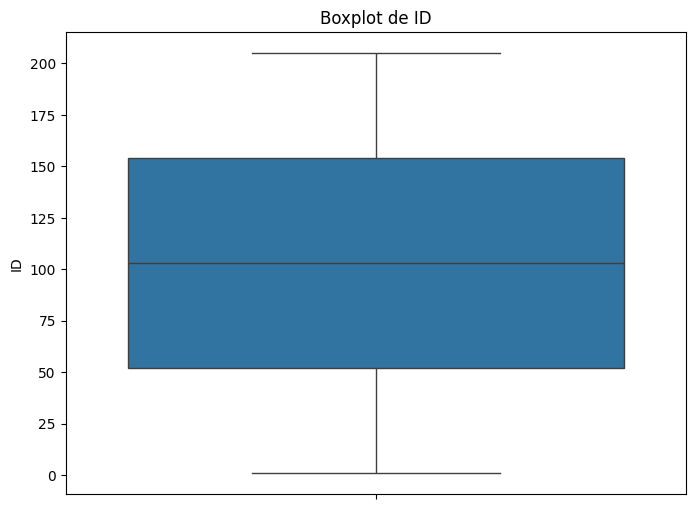

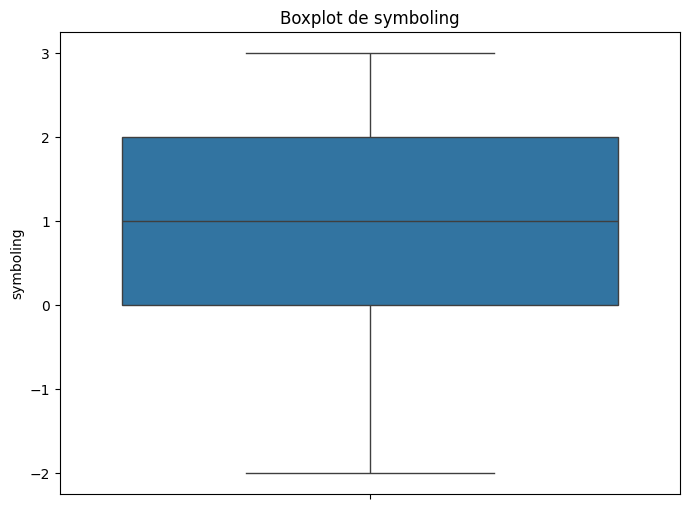

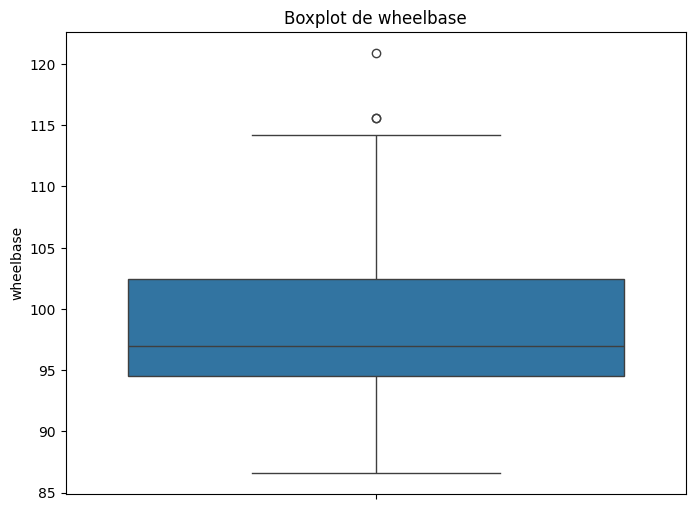

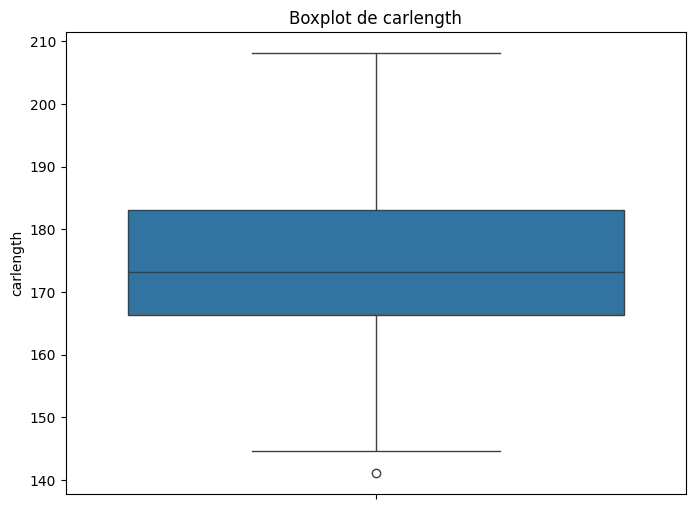

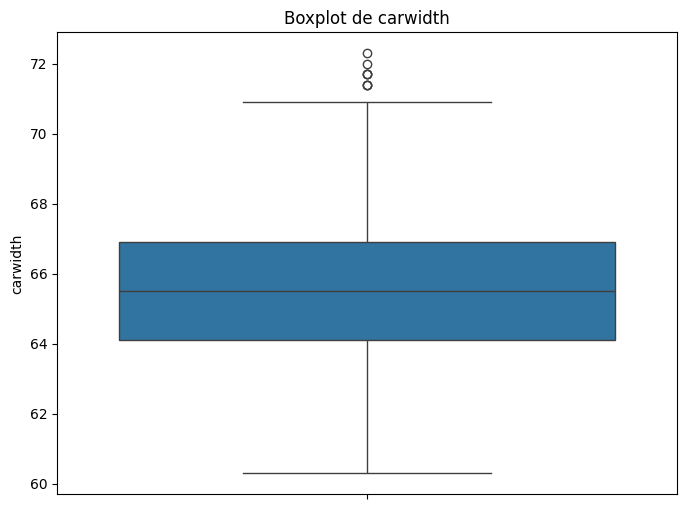

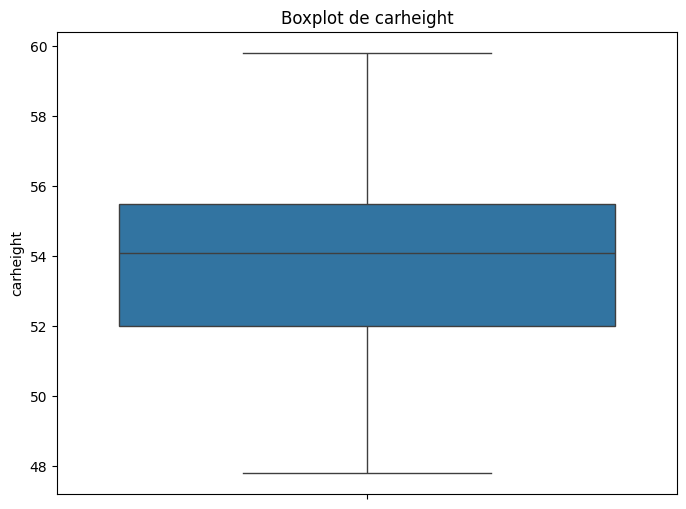

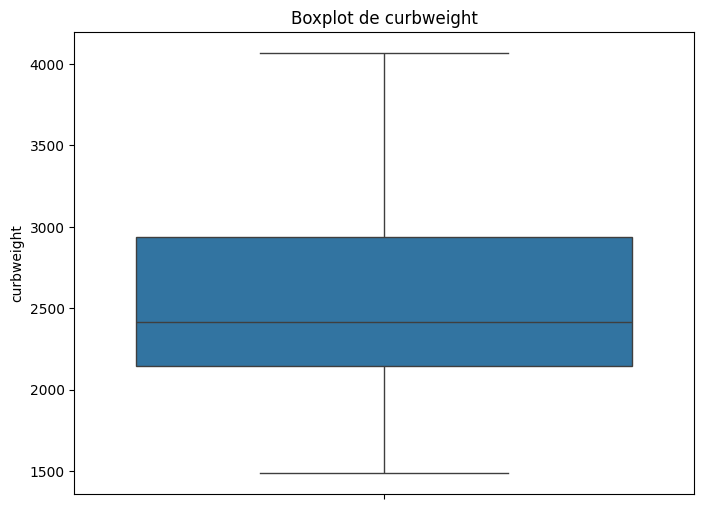

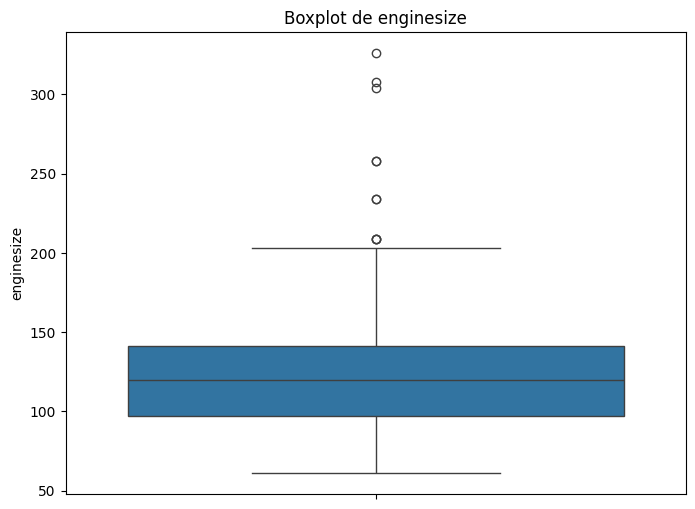

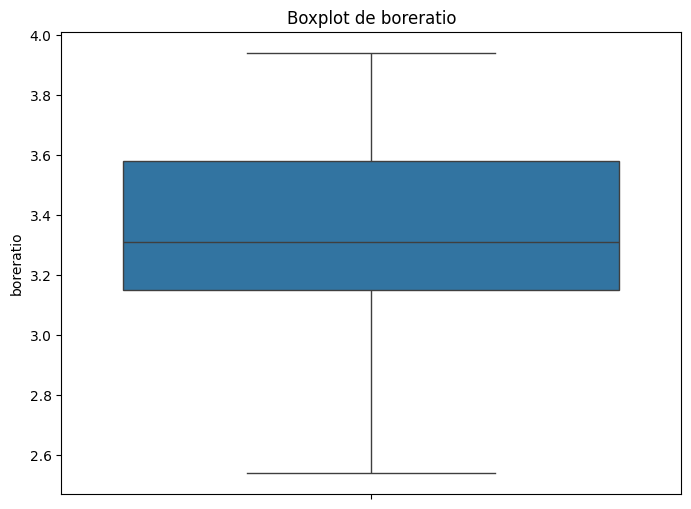

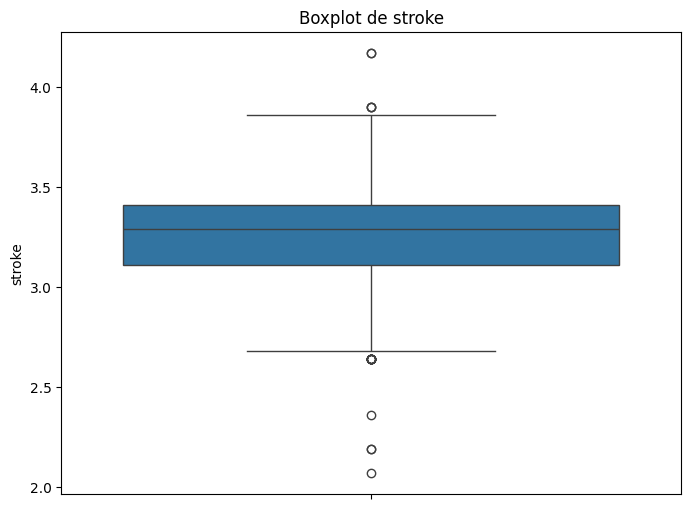

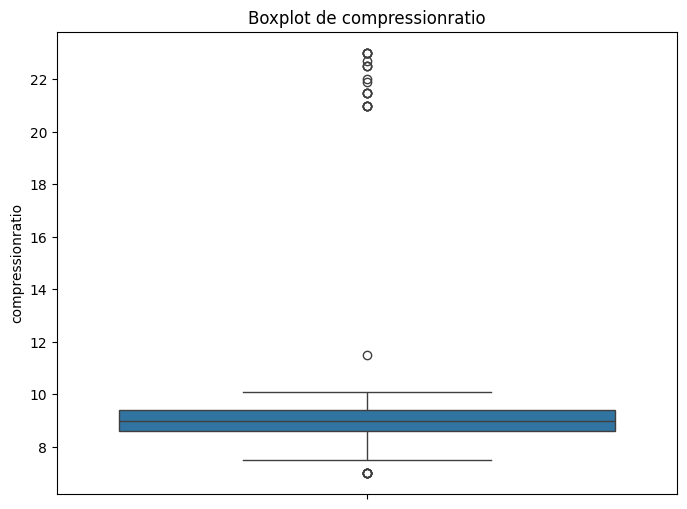

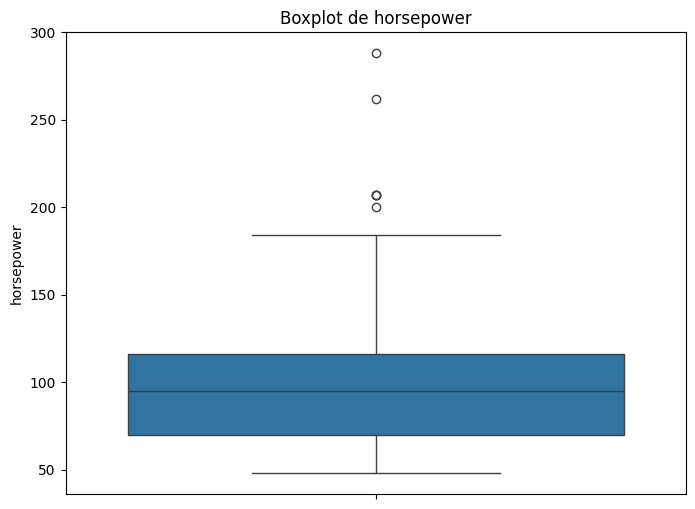

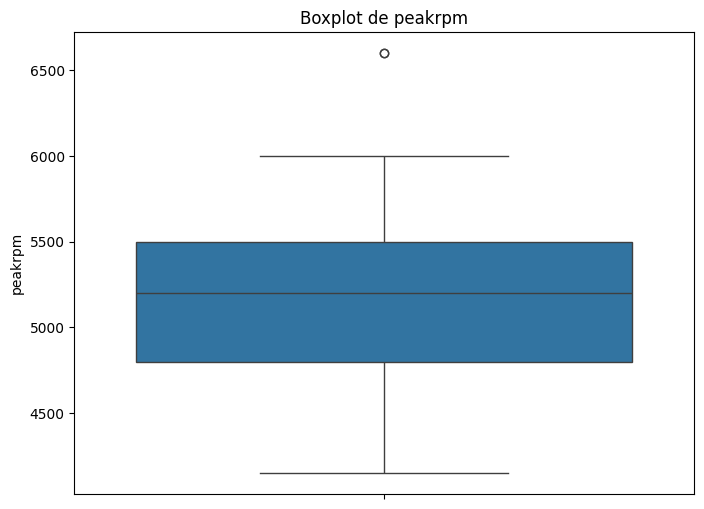

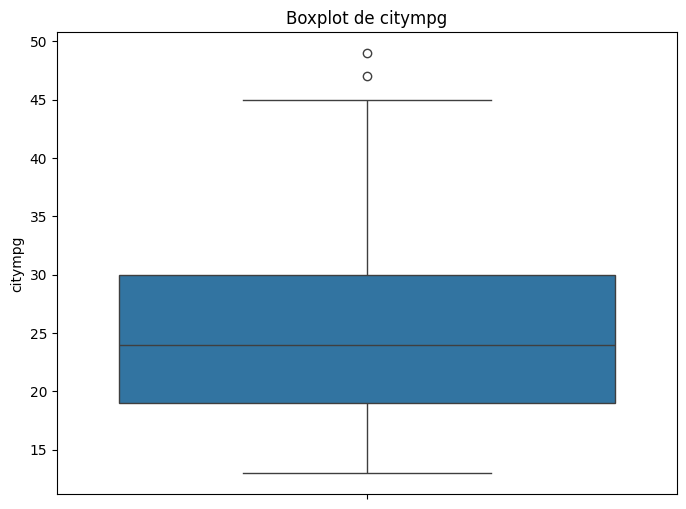

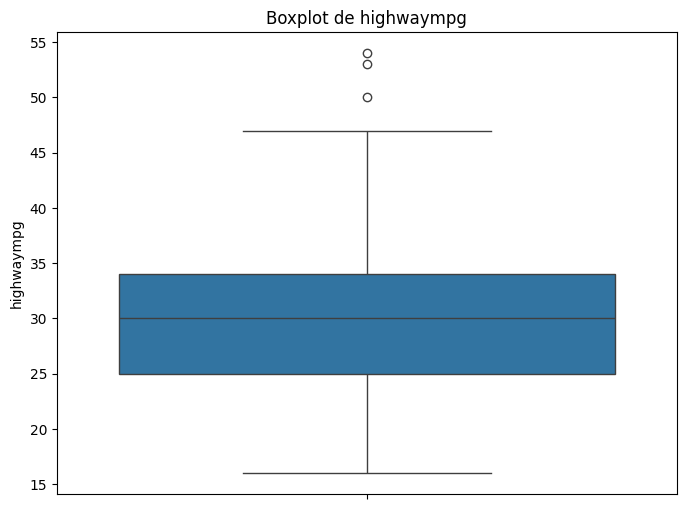

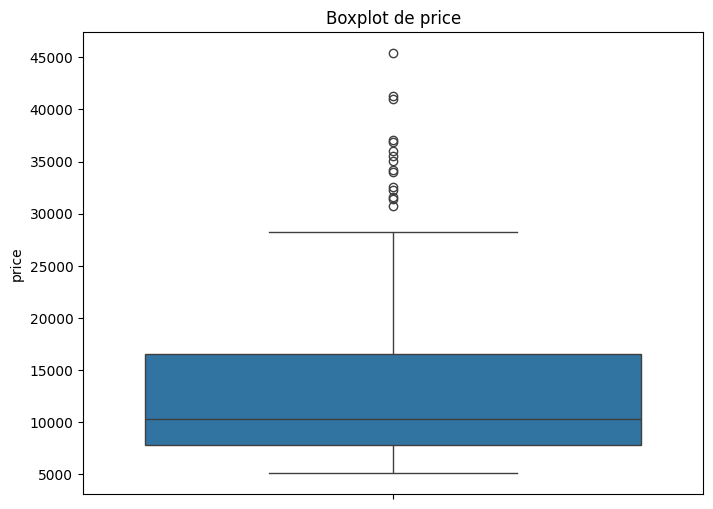

In [ ]:
# Seu códigoboxplots
# Utilizando visualizações como  para identificar outliers
for coluna in codificacao_one_hot.select_dtypes(include=np.number):
    plt.figure(figsize=(8,6))
    sns.boxplot(y=codificacao_one_hot[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

**Insights após análise dos gráficos de Boxplot e os outliers:**

* Presença de Outliers: Os boxplots das variáveis
numéricas (preço, potência, peso, etc.) revelam outliers, indicando carros com valores atípicos, como preços ou potências excepcionalmente altos/baixos.

* Variabilidade: A amplitude das caixas e bigodes nos boxplots mostra alta variabilidade em variáveis como preço e potência, sugerindo grande diversidade nas características dos carros.

* Distribuição: A posição da mediana e o tamanho dos bigodes indicam distribuições assimétricas. Por exemplo, preços com mediana próxima ao primeiro quartil e bigode superior longo sugerem mais carros baratos e poucos muito caros.

* Impacto no Modelo: Outliers podem comprometer a precisão da regressão linear múltipla, exigindo tratamento (remoção, transformação ou modelo robusto).

* Variáveis Relevantes: Variáveis como potência, com alta variabilidade e possível correlação com preço, parecem ser preditores importantes.

* Insights de Mercado: Os boxplots destacam faixas de preço predominantes, características atípicas e relações entre variáveis, oferecendo uma visão clara do mercado de carros analisado.

**Alguns modelos pra tratar os outliers:**


* Remoção: Remover as linhas que contêm outliers. Essa é uma abordagem simples, mas pode levar à perda de informações valiosas se houver muitos outliers.

* Substituição: Substituir os outliers por valores menos extremos, como a mediana ou a média da coluna.

* Transformação: Aplicar uma transformação matemática, como a transformação logarítmica, para reduzir o impacto dos outliers na análise.

* Winsorização: Similar à substituição, mas os outliers são substituídos por valores próximos aos limites aceitáveis, em vez da média ou mediana

#### 5. **Normalização ou Padronização**

* Aplique técnicas de escalonamento para variáveis numéricas:

  * Normalização (Min-Max Scaling).
  * Padronização (Z-score).


In [ ]:
# Normalização Min-Max Scaling

# Criando um objeto MinMaxScaler
scaler = MinMaxScaler()

# Selecionando as colunas numéricas para normalizar
colunas_numericas = ['price', 'carwidth', 'enginesize', 'horsepower', 'wheelbase', 'curbweight', 'citympg', 'highwaympg']

# Normalizando as colunas selecionadas
codificacao_one_hot[colunas_numericas] = scaler.fit_transform(codificacao_one_hot[colunas_numericas])
print(codificacao_one_hot.head())

   ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1          3   0.058309      168.8  0.316667       48.8    0.411171   
1   2          3   0.058309      168.8  0.316667       48.8    0.411171   
2   3          1   0.230321      171.2  0.433333       52.4    0.517843   
3   4          2   0.384840      176.6  0.491667       54.3    0.329325   
4   5          2   0.373178      176.6  0.508333       54.3    0.518231   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0    0.260377       3.47    2.68  ...                 False   
1    0.260377       3.47    2.68  ...                 False   
2    0.343396       2.68    3.47  ...                 False   
3    0.181132       3.19    3.40  ...                 False   
4    0.283019       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1                  False               F

In [ ]:
# Padronização Z-score

# Criando um objeto StandardScaler
scaler = StandardScaler()

# Selecionando as colunas numéricas para padronizar
colunas_numericas = ['price', 'carwidth', 'enginesize', 'horsepower', 'wheelbase', 'curbweight', 'citympg', 'highwaympg'] # Substitua com suas colunas

# Padronizando as colunas selecionadas
codificacao_one_hot[colunas_numericas] = scaler.fit_transform(codificacao_one_hot[colunas_numericas])
print(codificacao_one_hot.head())

   ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1          3  -1.690772      168.8 -0.844782       48.8   -0.014566   
1   2          3  -1.690772      168.8 -0.844782       48.8   -0.014566   
2   3          1  -0.708596      171.2 -0.190566       52.4    0.514882   
3   4          2   0.173698      176.6  0.136542       54.3   -0.420797   
4   5          2   0.107110      176.6  0.230001       54.3    0.516807   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0    0.074449       3.47    2.68  ...                 False   
1    0.074449       3.47    2.68  ...                 False   
2    0.604046       2.68    3.47  ...                 False   
3   -0.431076       3.19    3.40  ...                 False   
4    0.218885       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1                  False               F

### 6. **Analise de Correlação**

* Realize a analise de correlação com as diferentes variaveis e descreva quais devem ser utilizadas para realizar a predição

In [ ]:
# Calcula a matriz de correlação
codificacao_one_hot = pd.get_dummies(df, columns=['fueltypes'], drop_first=True)
correlation_matrix = codificacao_one_hot.select_dtypes(include=np.number).corr()

# Seleciona a correlação de 'price' com as outras colunas
price_correlation = correlation_matrix['price']

# Remove a correlação de 'price' com ele mesmo
price_correlation = price_correlation.drop('price')

# Ordena os valores de correlação em ordem decrescente
price_correlation = price_correlation.sort_values(ascending=False)

# Exibe os valores de correlação
print("Correlação do Preço com Outras Variáveis:\n", price_correlation)

Correlação do Preço com Outras Variáveis:
 enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
ID                 -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


**Após análise das correlações entre Preço e as Outras Variáveis**
* Temos as variáveis com alta correlação positiva com o preço: enginesize, curbweight, horsepower, carwidth, carlength, wheelbase.

* Temos as variáveis com alta correlação negativa com o preço: citympg, highwaympg. Essas variáveis tendem a diminuir quando o preço aumenta, indicando uma relação inversa.

Podemos ver que de acordo com a forte correlação tanto positiva quanto negativa, conseguimos inferir que essas variáveis tendem a variar de acordo com a mudança dos preços, indicando uma forte relação. Assim utilizaremos essas variáveis para a predição do preço.


#### 7. **Divisão dos Dados**

* Separe os dados em conjuntos de treinamento e teste (por exemplo, 80% treinamento e 20% teste) utilizando `train_test_split` do scikit-learn.


In [ ]:
# Definindo as variáveis preditoras (X) e a variável alvo (y)
X = codificacao_one_hot[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'citympg', 'highwaympg']]
y = codificacao_one_hot['price']

# Separando os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos conjuntos
print("Dimensões do conjunto de treinamento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)

Dimensões do conjunto de treinamento (X_train, y_train): (164, 8) (164,)
Dimensões do conjunto de teste (X_test, y_test): (41, 8) (41,)



#### 8. **Construção do Modelo de Regressão Linear Múltipla**

* Utilize o `LinearRegression` do scikit-learn para treinar o modelo com os dados de treinamento.


In [ ]:
# Criando um objeto do modelo LinearRegression
modelo = LinearRegression()

# Treinando o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

LinearRegression()

#### 9. **Avaliação do Modelo**

* Avalie o desempenho do modelo utilizando métricas como:

  * R² (coeficiente de determinação).
  * RMSE (Root Mean Squared Error).
  * MAE (Mean Absolute Error).


In [ ]:
# Realizando revisões com os dados de teste
y_pred = modelo.predict(X_test)

# Calculando as métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Imprimindo as métricas
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.8168
RMSE: 3802.8666
MAE: 2723.3955


#### 10. **Interpretação dos Coeficientes**

* Analise os coeficientes do modelo para entender o impacto de cada variável independente na variável dependente.


In [ ]:
# Obtendo os coeficientes do modelo
coeficientes = modelo.coef_

# Criando um DataFrame para melhor visualização
df_coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': coeficientes})
df_coeficientes = df_coeficientes.sort_values(by='Coeficiente', ascending=False)

# Imprimindo os coeficientes
print(df_coeficientes)

     Variável  Coeficiente
3    carwidth   636.097762
0  enginesize    81.725076
7  highwaympg    78.164538
5   wheelbase    52.124593
2  horsepower    45.628823
1  curbweight     2.066591
4   carlength   -41.656282
6     citympg  -148.740742


**Interpretação dos Coeficientes:**

Com base nos valores, podemos inferir o seguinte sobre o impacto de cada variável no preço do carro:

* **Carwidth (largura do carro)**: Possui o maior impacto positivo no preço, com um coeficiente de 636.09. Isso indica que, para cada unidade de aumento na largura do carro, o preço previsto aumenta em aproximadamente R$ 636,09 e se mantém as outras variáveis constantes.

* **Enginesize (tamanho do motor)**: Também tem uma influência positiva significativa no preço, com um coeficiente de 81.72, assim carros com motores maiores tendem a ter preços mais altos.

* **Highwaympg (consumo de combustível na estrada)**: Curiosamente, apresenta um coeficiente positivo, de 78.16, sugerindo que carros com melhor consumo na estrada tendem a ter preços mais altos.

* **Wheelbase (distância entre eixos)**: Também tem um impacto positivo no preço, coeficiente de 52.12. Carros com maior distância entre eixos, geralmente associados a mais espaço interno e conforto, tendem a ser mais caros.

* **Horsepower (potência)**: Tem um impacto positivo moderado no preço, coeficiente de 45.62. Carros mais potentes tendem a ter preços um pouco mais altos.

* **Curbweight (peso do carro)**: Tem um impacto positivo muito pequeno no preço, com um coeficiente de 2.06. A influência do peso no preço é praticamente desprezível.

* **Carlength (comprimento do carro)**: Apresenta um coeficiente negativo de -41.65, indicando que carros mais compridos podem ter preços mais baixos. Isso pode ocorrer por carros mais compridos serem associados a categorias menos valorizadas no mercado ou que o comprimento esteja correlacionado com outros fatores como difculdade na usabilidade ou conforto do veículo, assim pode influenciar diminuindo o preço do carro.

* **Citympg (consumo de combustível na cidade)**: Tem o maior impacto negativo no preço, com coeficiente de -148.74. Carros com pior consumo de combustível na cidade tendem a ter preços significativamente mais baixos. Isso pode ser explicado pela preferência por carros mais econômicos em ambientes urbanos.